In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [2]:
num_features = 50

num_samples = 1000
data1 = np.random.uniform(7.0, 10.0, size=(500, num_features))
data2 = np.random.uniform(4.0, 10.0, size=(500, num_features))
data3 = np.random.uniform(2.0, 10.0, size=(500, num_features))
data =np.concatenate((data1, data2, data3), axis=0)


In [3]:
df = pd.DataFrame(data)

In [4]:
df = df.rename(columns={col: f'Môn{i+1}' for i, col in enumerate(df.columns)})

In [5]:
df = df.sample(frac=1)

In [21]:
df.head()

,Môn1,Môn2,Môn3,Môn4,Môn5,Môn6,Môn7,Môn8,Môn9,Môn10,...,Môn43,Môn44,Môn45,Môn46,Môn47,Môn48,Môn49,Môn50,TB,Grade
0,7.614805,8.432695,9.739260,7.514045,9.716328,8.629942,8.089906,8.787271,7.302190,8.646086,...,9.822472,8.747012,7.102675,9.460496,7.185297,9.193589,8.147340,9.285403,8.671181,A
1,9.172458,8.673107,8.813114,9.658617,9.968759,7.932860,9.101613,8.995995,8.222925,8.995448,...,9.825651,7.107953,9.989350,7.382590,9.921633,7.002760,7.712632,9.347205,8.651860,A
2,8.145754,7.405483,2.098185,5.359938,8.959413,4.088708,7.979245,2.339220,3.855439,5.853603,...,4.486249,4.363985,4.625705,4.927222,9.396399,3.540746,6.838980,9.114735,6.202752,C
3,9.795398,9.808644,9.038408,9.527267,7.854598,8.023329,7.292862,7.134118,7.725492,9.743637,...,7.080703,9.249716,8.032573,8.131341,8.008802,8.488128,7.522149,7.104731,8.507968,A
4,7.310591,8.181978,9.370978,9.215867,9.511673,7.714008,8.099044,9.383331,9.690420,7.648052,...,7.473397,7.460588,8.773091,7.355643,8.371523,9.596208,9.832191,8.388635,8.558955,A


In [7]:
df = df.reset_index(drop=True)

In [8]:
df['TB'] = df.iloc[:,:].mean(axis=1)

In [9]:
bins = [4, 4.9, 5.4, 6.4, 6.9, 7.9, 8.4,10] # Các ngưỡng điểm trung bình
labels = ['D', 'D+', 'C','C+', 'B', 'B+', 'A']  # Nhãn tương ứng với các khoảng điểm

# Chuyển đổi điểm trung bình thành điểm chữ và gán lại cho cột 'Điểm trung bình'
df['Grade'] = pd.cut(df['TB'], bins=bins, labels=labels, right=True, include_lowest=True)

In [24]:
df.head()

,Môn1,Môn2,Môn3,Môn4,Môn5,Môn6,Môn7,Môn8,Môn9,Môn10,...,Môn43,Môn44,Môn45,Môn46,Môn47,Môn48,Môn49,Môn50,TB,Grade
0,7.614805,8.432695,9.739260,7.514045,9.716328,8.629942,8.089906,8.787271,7.302190,8.646086,...,9.822472,8.747012,7.102675,9.460496,7.185297,9.193589,8.147340,9.285403,8.671181,A
1,9.172458,8.673107,8.813114,9.658617,9.968759,7.932860,9.101613,8.995995,8.222925,8.995448,...,9.825651,7.107953,9.989350,7.382590,9.921633,7.002760,7.712632,9.347205,8.651860,A
2,8.145754,7.405483,2.098185,5.359938,8.959413,4.088708,7.979245,2.339220,3.855439,5.853603,...,4.486249,4.363985,4.625705,4.927222,9.396399,3.540746,6.838980,9.114735,6.202752,C
3,9.795398,9.808644,9.038408,9.527267,7.854598,8.023329,7.292862,7.134118,7.725492,9.743637,...,7.080703,9.249716,8.032573,8.131341,8.008802,8.488128,7.522149,7.104731,8.507968,A
4,7.310591,8.181978,9.370978,9.215867,9.511673,7.714008,8.099044,9.383331,9.690420,7.648052,...,7.473397,7.460588,8.773091,7.355643,8.371523,9.596208,9.832191,8.388635,8.558955,A


In [11]:
df['Grade'].unique()

['A', 'C', 'B+', 'C+', 'B', 'D+']
Categories (7, object): ['D' < 'D+' < 'C' < 'C+' < 'B' < 'B+' < 'A']

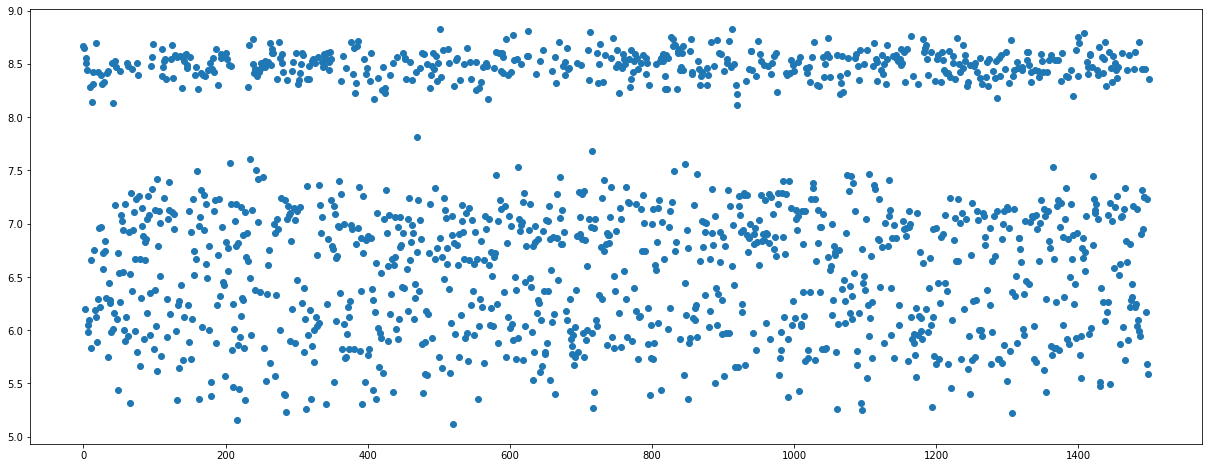

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(21,8))
plt.scatter( np.arange(1500),df['TB'])

plt.show()

In [13]:
X = df.iloc[:,:-2]
y = df[['Grade']]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [16]:
pca = PCA(n_components=0.90)  # Chọn số lượng thành phần chính cần giữ lại là 30
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_scaled_test)

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Tỉ lệ phương sai được giải thích bởi mỗi thành phần chính:", explained_variance_ratio)

Tỉ lệ phương sai được giải thích bởi mỗi thành phần chính: [0.27530245 0.02214672 0.02154694 0.02121986 0.02032356 0.02019326
 0.0198791  0.01957969 0.01884533 0.01874903 0.01817164 0.01808877
 0.0179016  0.01755879 0.01727145 0.0170862  0.01654565 0.0163349
 0.01601111 0.01577301 0.01556251 0.01530052 0.01500482 0.01489093
 0.01456123 0.01442757 0.01428164 0.01398377 0.01379021 0.01359406
 0.01339067 0.01332959 0.01317057 0.01295189 0.01233715 0.01201807
 0.01198067 0.0118669  0.0117198  0.01135662 0.01118047]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
clf.fit(X_pca, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\2392130277.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_pca, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [30]:
y_pred = clf.predict(X_test_pca)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)

Độ chính xác của mô hình: 0.8


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_pca, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [33]:
y_pred_logreg = logreg.predict(X_test_pca)

In [34]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Độ chính xác của mô hình Logistic Regression:", accuracy_logreg)

Độ chính xác của mô hình Logistic Regression: 0.9266666666666666
